In [152]:
import numpy as np
import scipy.integrate as sci
import time
import matplotlib.pyplot as plt

In [153]:
def f(t, y, mu): # RHS of Van der Pol oscillator ODE
    dy = np.zeros((2,))
    dy[0] = y[1]
    dy[1] = mu*(1 - y[0]**2)*y[1] - y[0]
    return dy


# parameters
y0 = [2,0]
tmax = 1000.0
sols = []
mu_list = [1e1, 1e2, 1e3]
eps_list = [1e-6, 1e-9, 1e-12]
method_list = ["RK45", "LSODA"]

for method in method_list:
    for mu in mu_list:
        for eps in eps_list:
            
            # dictionary with method name, stiffness, tolerance
            sol_entry = {
                "method": method,
                "mu": mu,
                "eps": eps
            }  
            
            # solve by RK45/LSODA
            start_time = time.time()
            sol = sci.solve_ivp(f, [0,tmax], y0, method = method, args = (mu,), rtol = eps, atol = eps)
            tcpu = time.time() - start_time
            sol_entry["tcpu"] = tcpu
            sol_entry["sol"] = sol.y
            sols.append(sol_entry)
            print("\nmethod:", method, "mu:", mu, "eps:", eps, "tcpu:", tcpu, "\nsol:", sol.y)
print("\nDONE")


method: RK45 mu: 10.0 eps: 1e-06 tcpu: 0.9579861164093018 
sol: [[ 2.          1.99987443  1.99946962 ...  1.23865206  1.20814345
   1.18044333]
 [ 0.         -0.01997358 -0.03612175 ... -0.2085904  -0.2282585
  -0.24902806]]

method: RK45 mu: 10.0 eps: 1e-09 tcpu: 3.292056083679199 
sol: [[ 2.          1.99999137  1.99995919 ...  1.19646402  1.18773343
   1.18049596]
 [ 0.         -0.0057045  -0.0119741  ... -0.23664891 -0.24326523
  -0.24898525]]

method: RK45 mu: 10.0 eps: 1e-12 tcpu: 12.594722509384155 
sol: [[ 2.00000000e+00  1.99999944e+00  1.99999728e+00 ...  1.18282777e+00
   1.18055310e+00  1.18049607e+00]
 [ 0.00000000e+00 -1.48124652e-03 -3.24206754e-03 ... -2.47118443e-01
  -2.48939225e-01 -2.48985157e-01]]

method: RK45 mu: 100.0 eps: 1e-06 tcpu: 4.551734924316406 
sol: [[ 2.          1.99999678  1.99998915 ...  1.83559016  1.83547015
   1.83542384]
 [ 0.         -0.00297403 -0.00462134 ... -0.00774619 -0.00774653
  -0.00774783]]

method: RK45 mu: 100.0 eps: 1e-09 tcpu: 5

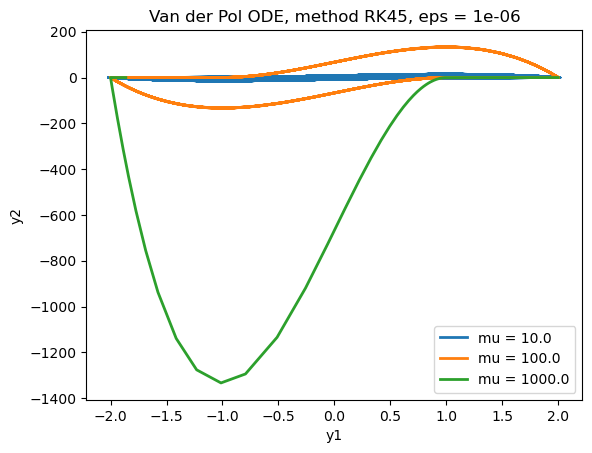

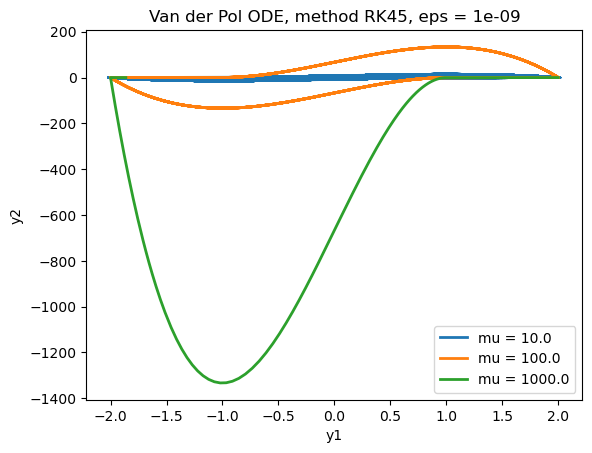

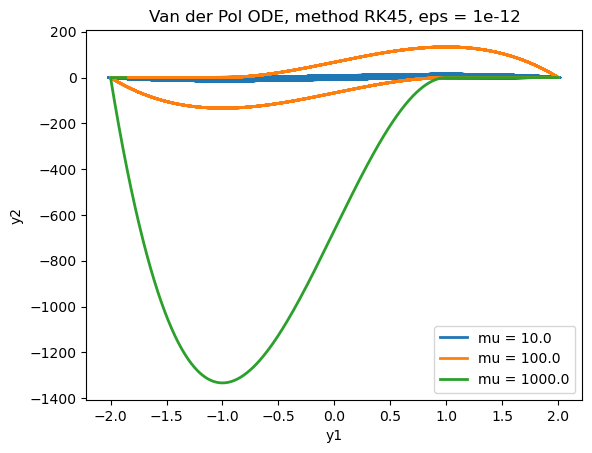

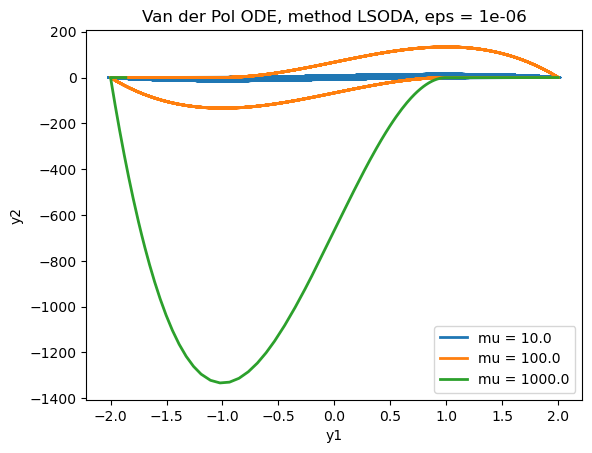

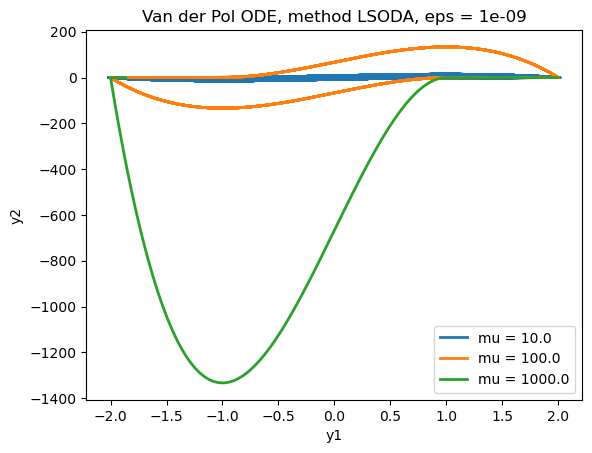

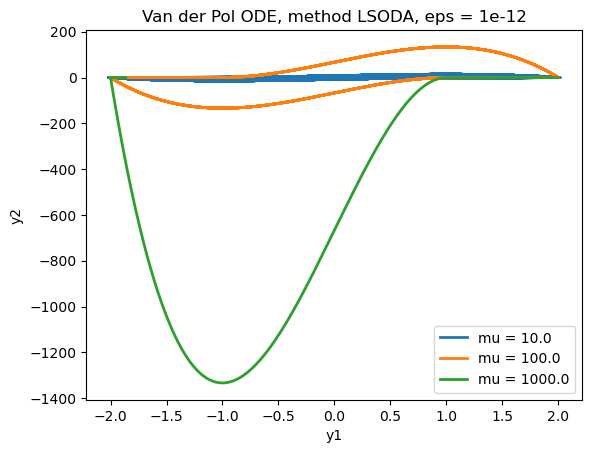

In [161]:
# plot sols with fixed method and eps, varying mu
for method in method_list:
    for eps in eps_list:
        sol_res = list(filter(lambda sol: sol["method"] == method and sol["eps"] == eps, sols))
        plt.rcParams.update({'font.size': 10})
        for sol in sol_res:
            plt.plot(sol["sol"][0], sol["sol"][1], linewidth=2, label="mu = "+str(sol["mu"])) 
        plt.title("Van der Pol ODE, method {}, eps = {}".format(method, eps))
        plt.legend()
        plt.xlabel("y1")
        plt.ylabel("y2")
        ax.set_aspect(1)
        plt.show()

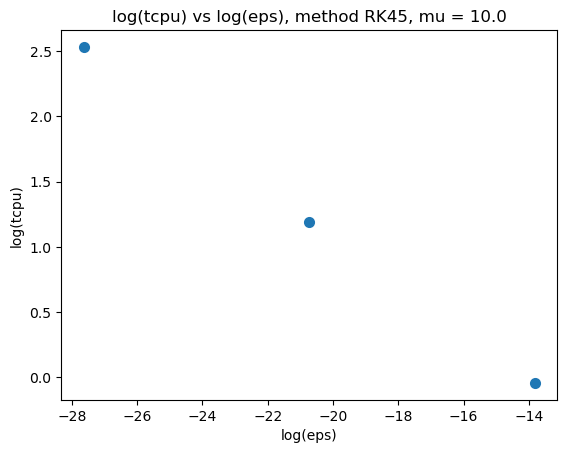

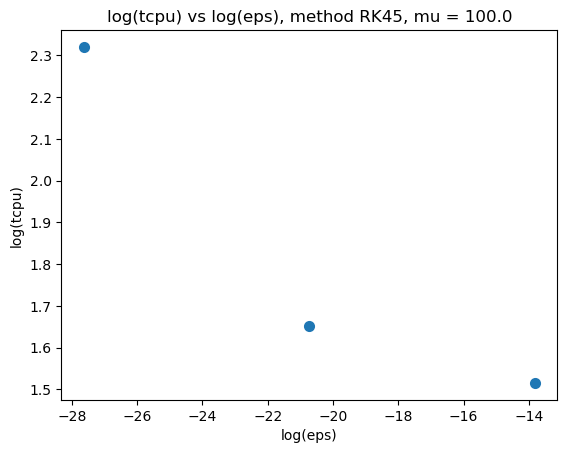

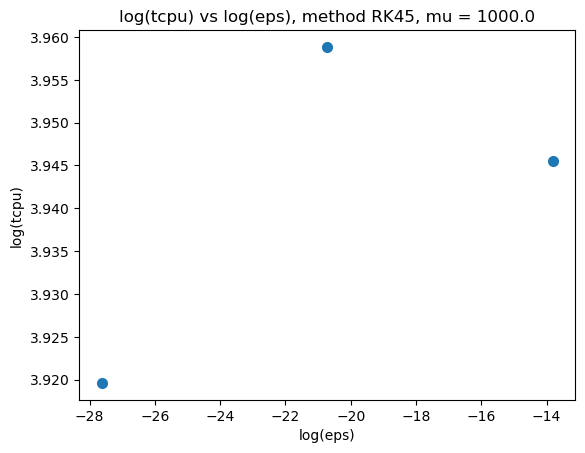

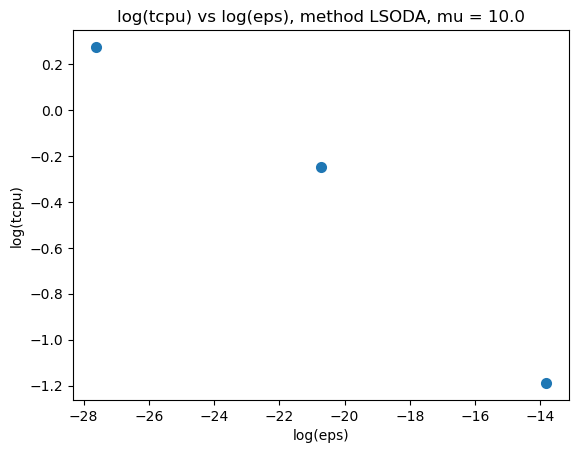

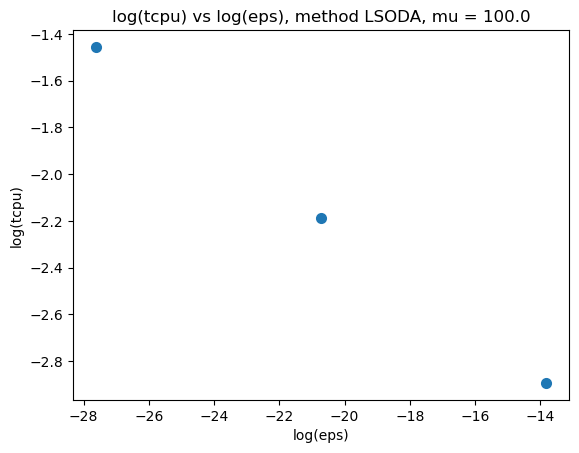

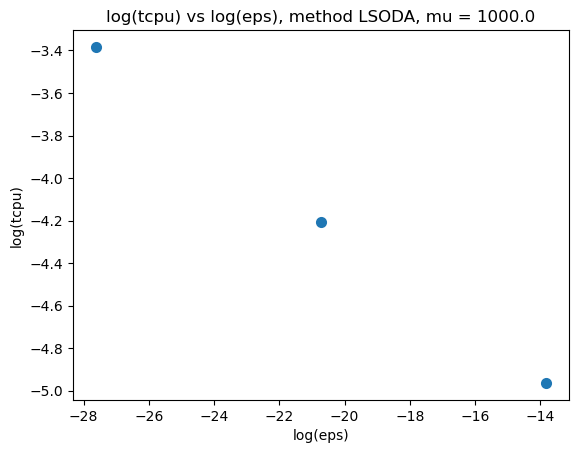

In [162]:
# for fixed method and mu, plot log(tcpu) vs log(eps)
for method in method_list:
    for mu in mu_list:
        sol_res = list(filter(lambda sol: sol["method"] == method and sol["mu"] == mu, sols))
        plt.rcParams.update({'font.size': 10})
        eps = [sol["eps"] for sol in sol_res]
        tcpu = [sol["tcpu"] for sol in sol_res]
        plt.scatter(np.log(eps), np.log(tcpu), linewidth=2) 
        plt.title("log(tcpu) vs log(eps), method {}, mu = {}".format(method, mu))
        plt.xlabel("log(eps)")
        plt.ylabel("log(tcpu)")
        ax.set_aspect(1)
        plt.show()

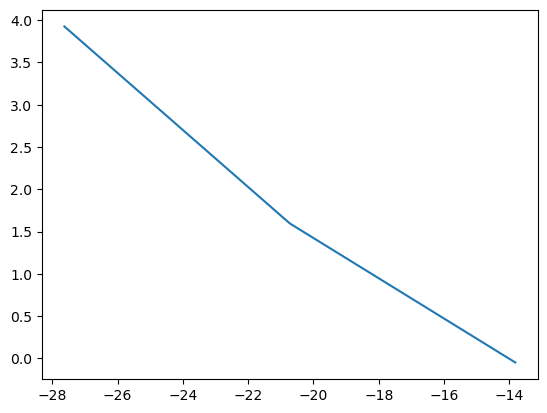

In [123]:
plt.plot(np.log(params[:,1:]), np.log(tcpu_rk))

In [122]:
#You should make one plot of the solution for each μ just to see what the solution looks like. Hence the total number of solution plots is 3. You need to have a total of 18 measurements of the CPU time. You also need to make 6 plots of log CPU time vs log error tolerance.

[[1.e+01 1.e-06]
 [1.e+02 1.e-09]
 [1.e+03 1.e-12]]
[[1.e-06]
 [1.e-09]
 [1.e-12]]


In [133]:
a = []
d = {
    "name":"john",
    "age":45
}
g = {
    "name":"jack",
    "age":40
}
a.append(d)
a.append(g)
print(a)
for x in a:
    x["salary"]=x["age"]+5
print(a)
#b = list(filter(lambda x: x["age"]>40, a))
#print(b)

[{'name': 'john', 'age': 45}, {'name': 'jack', 'age': 40}]
[{'name': 'john', 'age': 45, 'salary': 50}, {'name': 'jack', 'age': 40, 'salary': 45}]
